In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
df =pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm =LinearRegression()
lm

LinearRegression()

In [7]:
X=df[['highway-mpg']]
Y=df[['price']]

In [8]:
lm.fit(X,Y)

LinearRegression()

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [10]:
lm.intercept_ #intercept

array([38423.30585816])

In [11]:
lm.coef_ #slope

array([[-821.73337832]])

In [12]:
lm1=LinearRegression()
lm1

LinearRegression()

In [13]:
X=df[['engine-size']]
Y=df[['price']]

In [14]:
lm1.fit(X,Y)

LinearRegression()

In [15]:
lm1.intercept_

array([-7963.33890628])

In [16]:
lm1.coef_

array([[166.86001569]])

In [17]:
# Yhat=166.86*X-7963.33

<h2>Multiple Linear Regression</h2>

In [18]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [19]:
lm.fit(Z,Y)

LinearRegression()

In [20]:
lm.intercept_

array([-15806.62462633])

In [21]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

Yhat=-15806.62+53.49*horsepower+4.7*curb-weight+81.53*engine-size+36.05*highway-mpg

In [22]:
lm2=LinearRegression()
lm2

LinearRegression()

In [23]:
X=df[['price']]
Z=df[['normalized-losses','highway-mpg']]


In [24]:
lm2.fit(Z,X)


LinearRegression()

In [25]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

<h2>Model evaluation using Visualization</h2>

In [26]:
import seaborn as sns
%matplotlib inline


(0.0, 48160.38746635601)

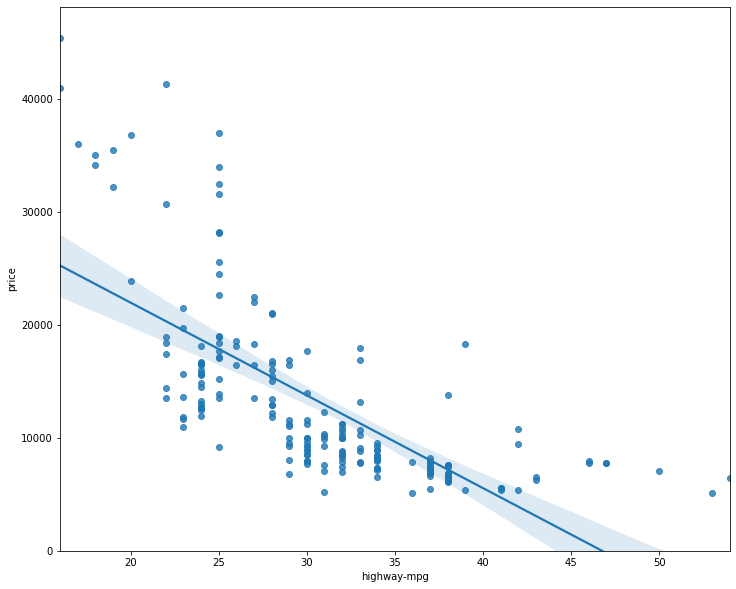

In [27]:
#Regression plot
width=12 
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

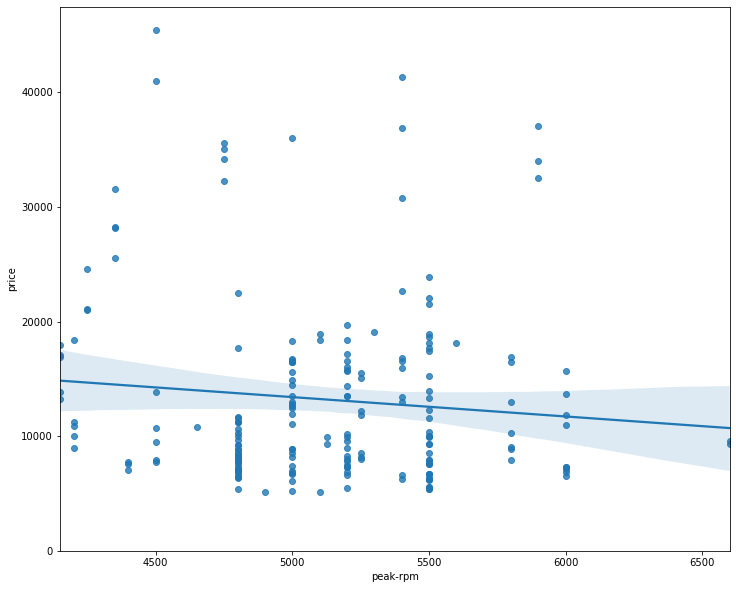

In [28]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [29]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


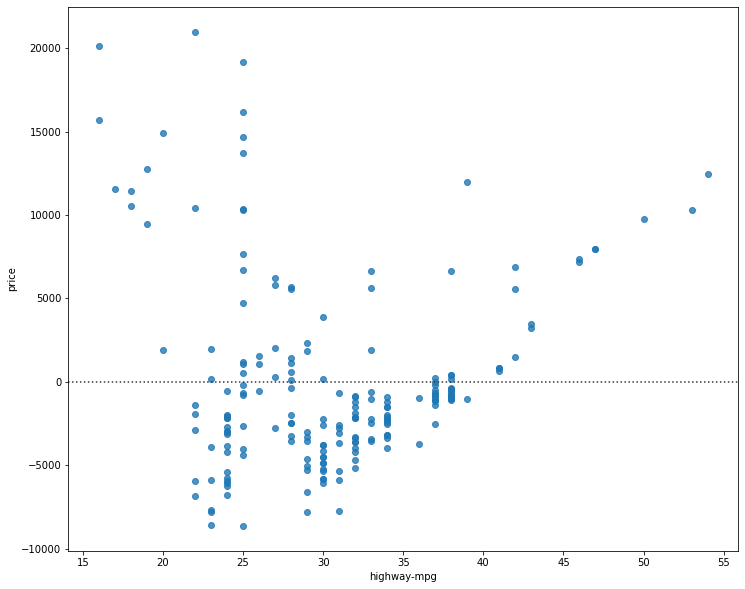

In [30]:
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)


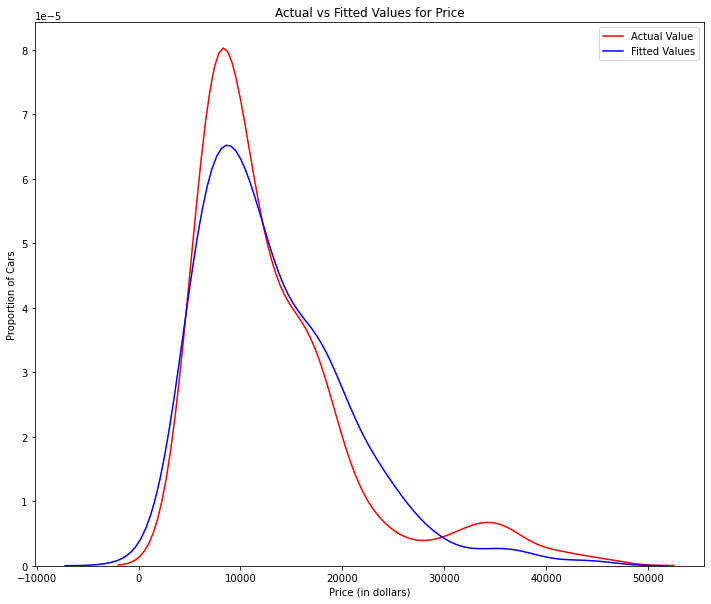

In [32]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>Part 3: Polynomial Regression and Pipelines</h2>

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x = df['highway-mpg']
y = df['price']

In [35]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


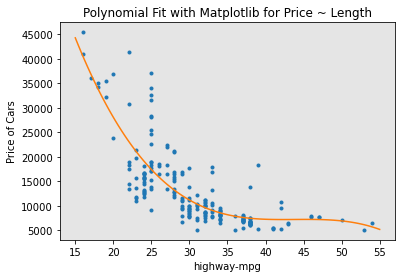

In [36]:
#Plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


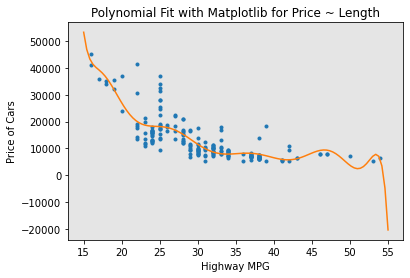

In [38]:
#Create 11 orders
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')


In [39]:
from sklearn.preprocessing import PolynomialFeatures


In [40]:
#create a polynomial feature object of degree 2
pr =PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [41]:
Z_pr=pr.fit_transform(Z)

In [42]:
Z.shape

(201, 4)

In [43]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
#create a tuple with 'name'/estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [46]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Create a pipeline that <b>Standardizes</b> the data, then perform prediction using a <b>linear regression model</b> using the features Z and targets y

In [49]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


Create a pineline that standardizes the data 
and perform prediction using a linear regression
model using feature Z and target Y



In [51]:
#Create a tuple list including name of model and its corresponding constructor
Input=[('scale',StandardScaler()),('model',LinearRegression())]


In [52]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [53]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [54]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>Part 4: Measures for In-Sample Evaluation</h2>

In [63]:
x=df[['highway-mpg']]
y=df[['price']]
#highway_mpg_fit
lm.fit(x,y)
#find the R^2
print('The r-square is: ',lm.score(x,y))

The r-square is:  0.4965911884339175


49.659% of variation price is explained by this model 'horsepower_fit'


In [66]:
#calculate MSE(Mean square error)
Yhat=lm.predict(x)
print('the output of the first four predicted value is:',Yhat[0:4])

the output of the first four predicted value is: [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [68]:
#import mean_square_error from module metrics
from sklearn.metrics import mean_squared_error

In [70]:
mse =mean_squared_error(df['price'],Yhat)
print('The mean square error of the price and predicted value is ',mse)

The mean square error of the price and predicted value is  31635042.944639895


In [71]:
#model2 Multiple Linear regression
#calculate R^2
lm.fit(Z, df['price'])
print('The R square is: ',lm.score(Z,df['price']))

The R square is:  0.8093562806577457


~80,9% of the variation of the price is explained by this multi linear regression 'multi_fit'


In [75]:
#We compare predict result with actual results

In [72]:

Y_predict_multifit =lm.predict(Z)

In [74]:
print('the mean square error of price and predicted value using multifit is: ',\
      mean_squared_error(df['price'],Y_predict_multifit))

the mean square error of price and predicted value using multifit is:  11980366.87072649


In [76]:
#model 3 polynomial fit
#calculate the R^2
from sklearn.metrics import r2_score


In [77]:
r_squared=r2_score (y,p(x))
print('The R-square value is ',r_squared)

The R-square value is  0.6741946663906517


In [78]:
#The MSE
mean_squared_error(df['price'],p(x))

20474146.42636122

In [79]:
p(x)

array([[14483.47732606],
       [14483.47732606],
       [15876.76908652],
       [11210.24198667],
       [23210.06482401],
       [17436.73388684],
       [17436.73388684],
       [17436.73388684],
       [28063.54752614],
       [12159.55360585],
       [12159.55360585],
       [13247.51877574],
       [13247.51877574],
       [17436.73388684],
       [23210.06482401],
       [23210.06482401],
       [28063.54752614],
       [ 6162.84640189],
       [ 7237.04153267],
       [ 7237.04153267],
       [ 7247.75722475],
       [ 7486.4972933 ],
       [11210.24198667],
       [ 7486.4972933 ],
       [ 7486.4972933 ],
       [ 7486.4972933 ],
       [11210.24198667],
       [11210.24198667],
       [19172.71155671],
       [ 5739.27108586],
       [ 7486.4972933 ],
       [ 7233.78149649],
       [ 8612.73442281],
       [ 8612.73442281],
       [ 8612.73442281],
       [ 8612.73442281],
       [ 9100.83013627],
       [ 9100.83013627],
       [ 9100.83013627],
       [ 9100.83013627],


<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [81]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [84]:
#create new input
new_input=np.arange(1,100,1).reshape(-1,1)

In [85]:
#fit the model
lm.fit(x,y)
lm

LinearRegression()

In [87]:
#produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

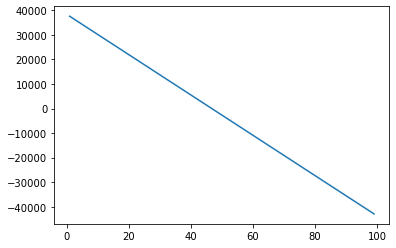

In [88]:
#plot the data
plt.plot(new_input,yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>
<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>
<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion:</h2>
<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
